In [1]:
# use model as ViViT model or slowfast model
import torch
import pandas as pd
import matplotlib.pyplot as plt
from src.CustomDataset import CustomDataset
from src.utils.sampler import ImbalancedDatasetSampler
from torch.utils.data import DataLoader

In [2]:
from src.utils.utility import show_data_composition
show_data_composition("./dataset/dur21_dis0/")

########### Total Dataset Composition ########### 
disruption :  77
normal :  9942
########### Train Dataset Composition ########### 
disruption :  45
normal :  5952
########### Valid Dataset Composition ########### 
disruption :  16
normal :  1990
########### Test Dataset Composition ########### 
disruption :  16
normal :  2000


/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/torchvision/transforms/_functional_video.py:5: UserWarning: The _functional_video module is deprecated. Please use the functional module instead.
  warnings.warn(
/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/torchvision/transforms/_transforms_video.py:25: UserWarning: The _transforms_video module is deprecated. Please use the transforms module instead.
  warnings.warn(


In [3]:
root_dir = "./dataset/dur21_dis0/"
image_size = 224
seq_len = 21
batch_size = 64

train_data = CustomDataset(root_dir = root_dir, task = 'train', ts_data = None, augmentation = False, crop_size = image_size, seq_len = seq_len, mode = 'video')
train_sampler = ImbalancedDatasetSampler(train_data)

train_loader_org = DataLoader(train_data, batch_size = batch_size, sampler=None, num_workers = 4, pin_memory=False)
train_loader_sampling = DataLoader(train_data, batch_size = batch_size, sampler=train_sampler, num_workers = 4, pin_memory=False)

In [4]:
org_x, org_y = next(iter(train_loader_org))
sampling_x, sampling_y = next(iter(train_loader_sampling))

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

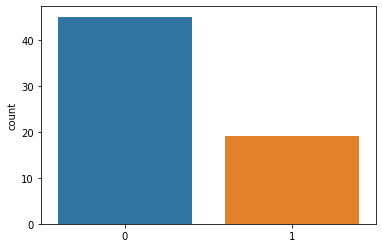

In [5]:
import seaborn as sns

sns.countplot(org_y.numpy())

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

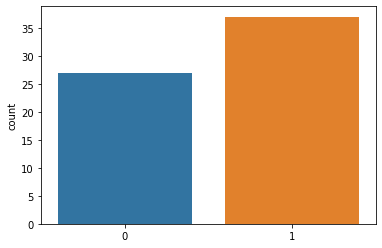

In [6]:
sns.countplot(sampling_y.numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

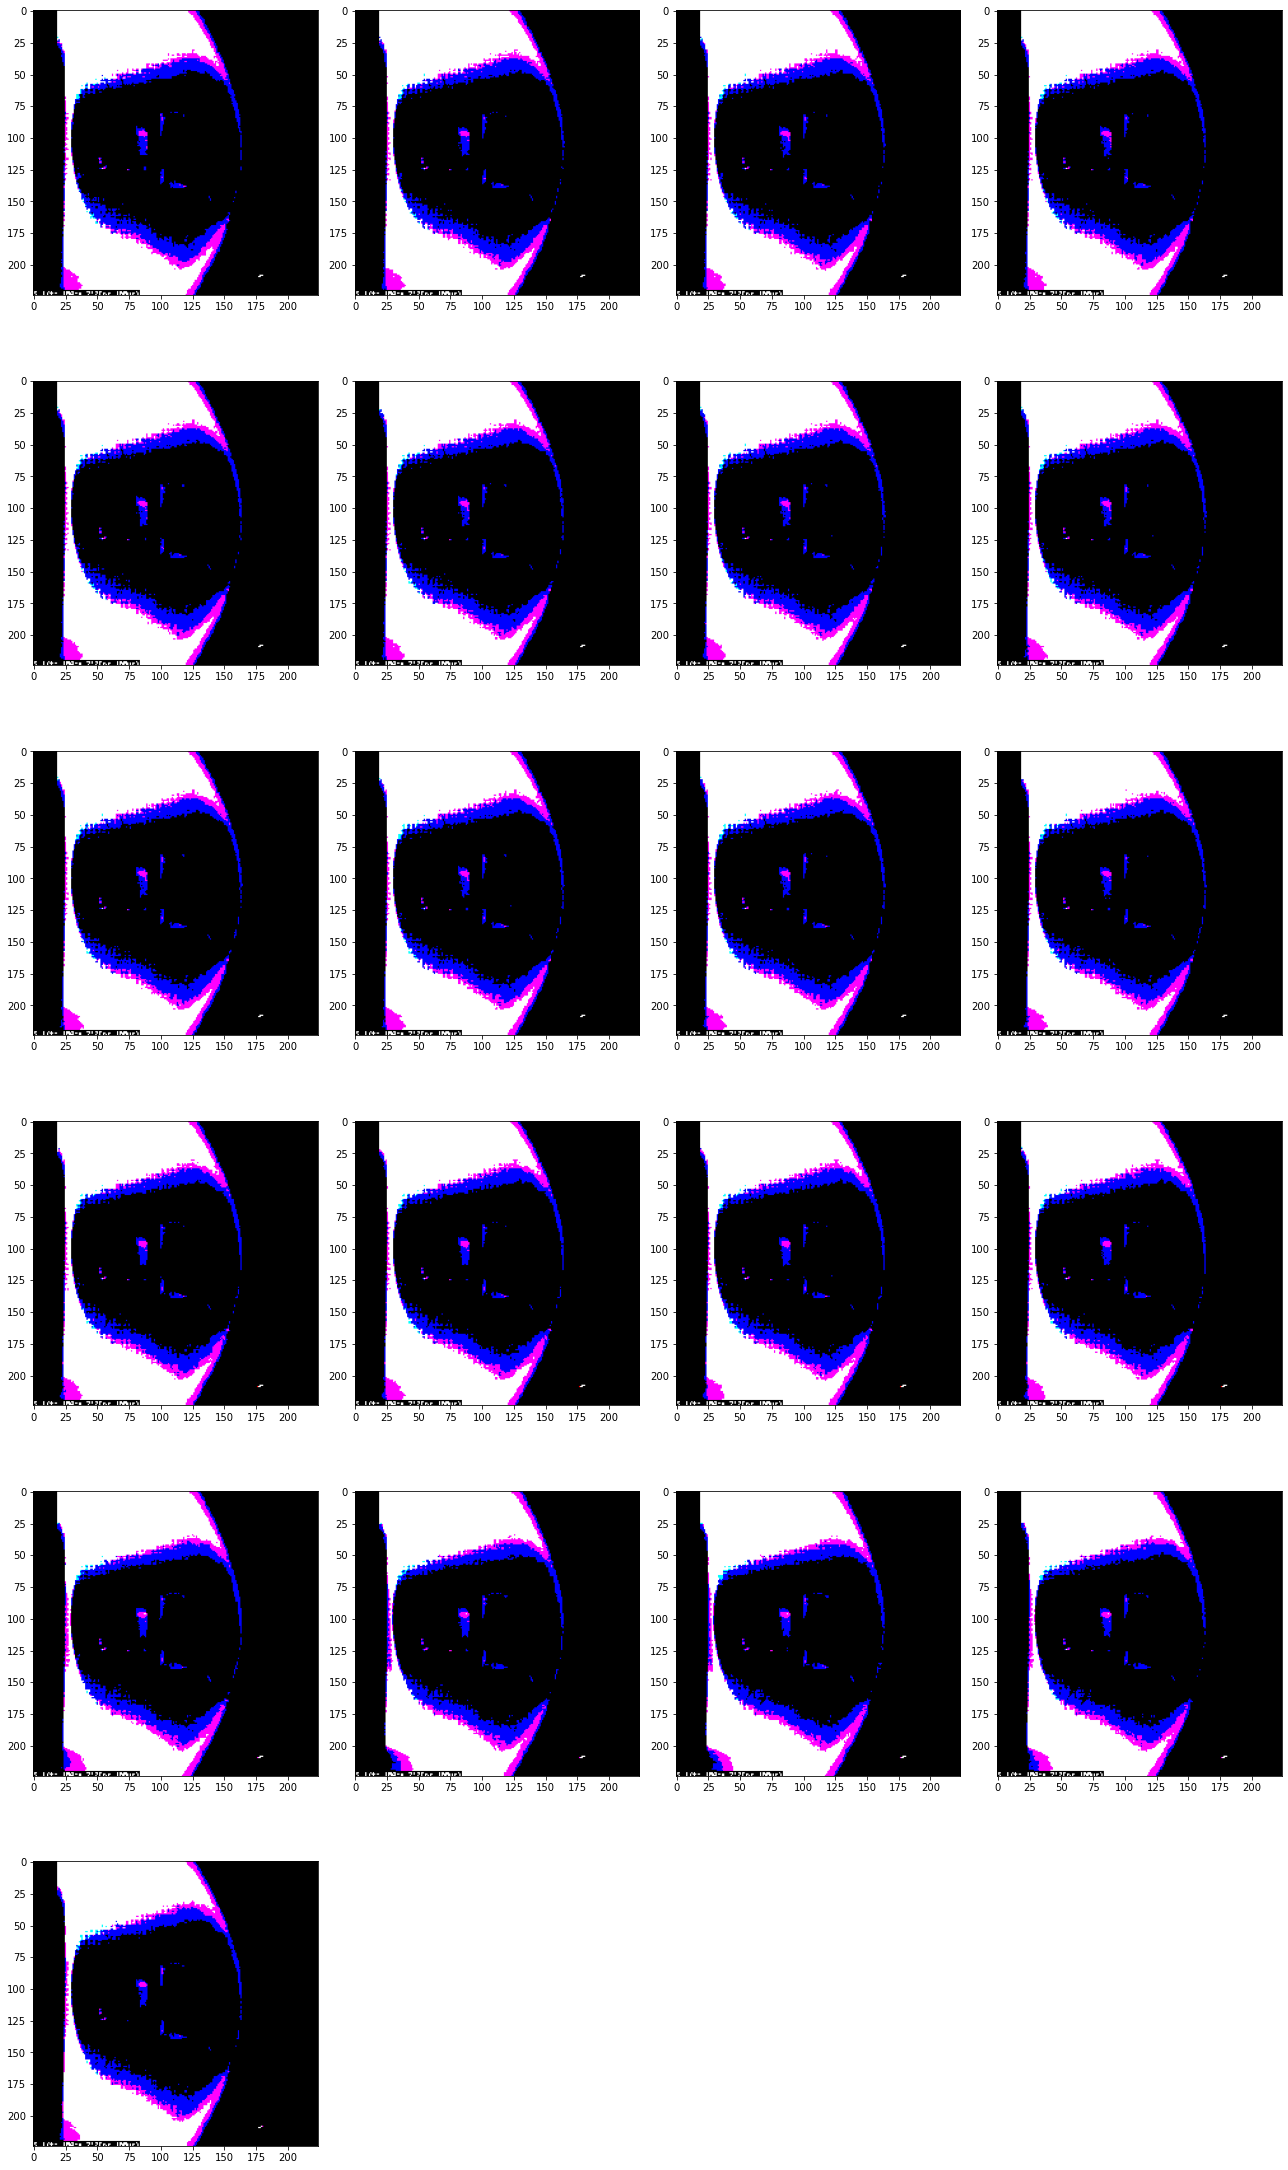

In [7]:
import numpy as np
sampling_x_disrupt = sampling_x[sampling_y.numpy() == 0]

tensor_disrupt = sampling_x_disrupt[-1]

from typing import Union
import matplotlib.pyplot as plt

def show_sequence(frames : Union[torch.Tensor, np.ndarray]):
    if frames == torch.Tensor:
        frames = frames.numpy()

    frames = np.transpose(frames, (1,2,3,0))

    fig_width = 18
    fig_height = 0
    fig_cols = 4
    fig_rows = len(frames) // fig_cols

    if len(frames) % fig_cols > 0:
        fig_rows += 1

    fig_height = int(fig_rows * 4.5) + 4

    axes=[]
    fig = plt.figure(figsize = (fig_width, fig_height))

    for idx in range(len(frames)):
        frame = frames[idx]
        axes.append(fig.add_subplot(fig_rows, fig_cols, idx+1))
        plt.imshow(frame)

    fig.tight_layout()    
    plt.show()

show_sequence(tensor_disrupt)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

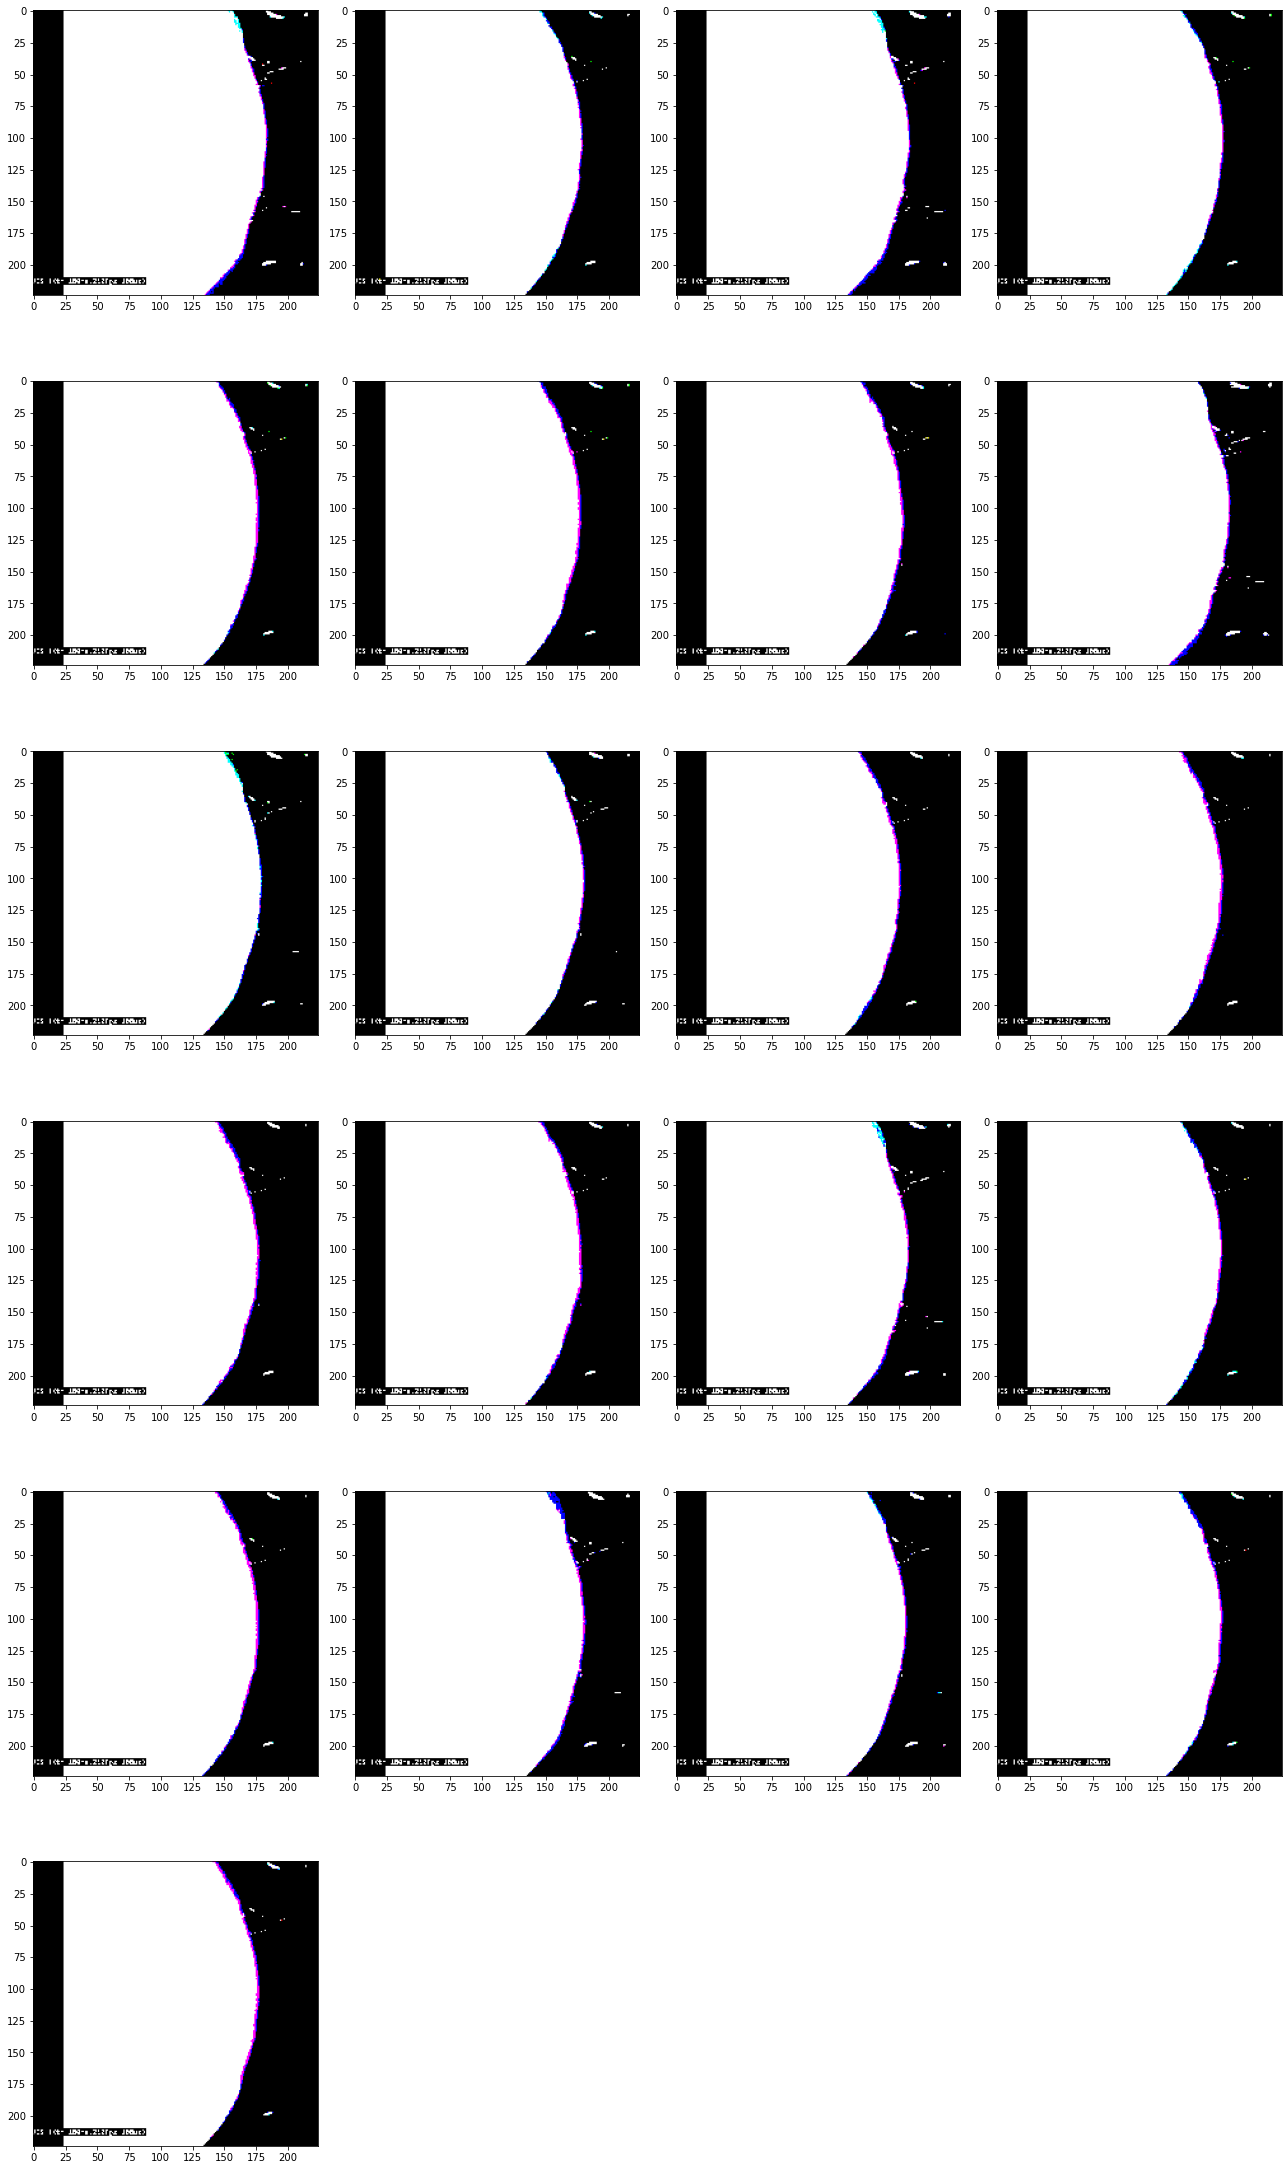

In [8]:
tensor_disrupt = org_x[org_y.numpy() == 1][-1]

show_sequence(tensor_disrupt)

/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/torchvision/transforms/_functional_video.py:5: UserWarning: The _functional_video module is deprecated. Please use the functional module instead.
  warnings.warn(
/home/zinzinbin/.conda/envs/research-env/lib/python3.9/site-packages/torchvision/transforms/_transforms_video.py:25: UserWarning: The _transforms_video module is deprecated. Please use the transforms module instead.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] 

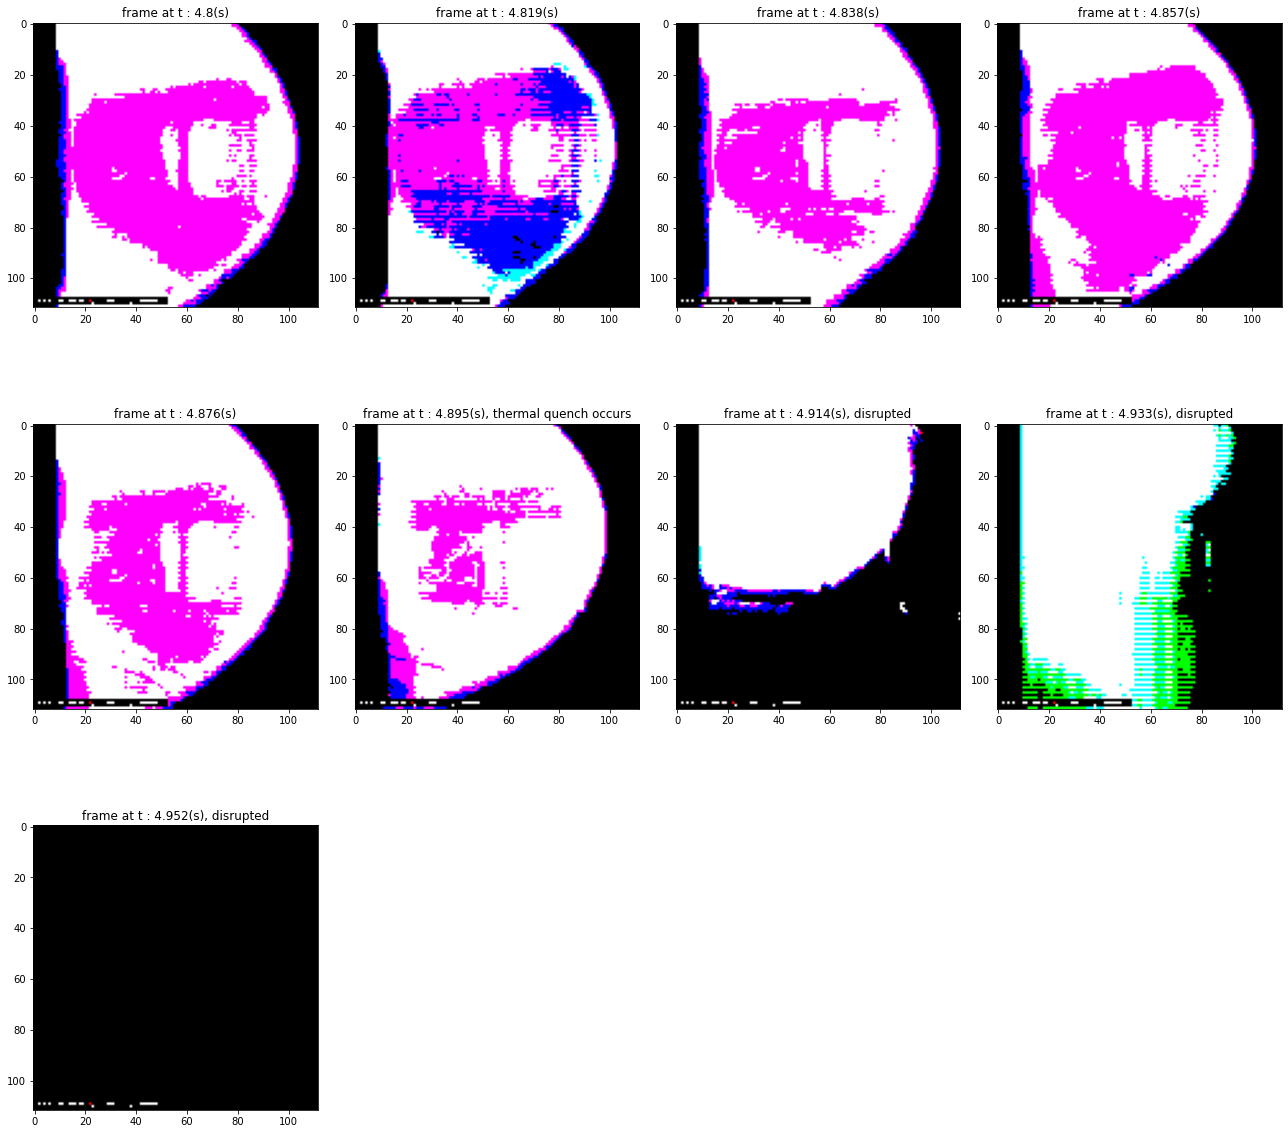

In [1]:
from src.visualization.visualize_video import show_all_frame

video_path = "./dataset/raw_videos/raw_videos/021731tv01.avi"
shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List.csv"
shot_number = 21731

show_all_frame(
    dir = video_path, 
    shot_list_dir = shot_list_dir,
    shot_number = shot_number,
    t_start = 4.8, 
    t_end = None, 
    t_interval = 1.0 / 210 * 4,
)

In [2]:
import pandas as pd
df_extend = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv")
df_extend[df_extend.shot == shot_number]

kstar_shot_list = pd.read_csv('./dataset/KSTAR_Disruption_Shot_List.csv')

tTQend = kstar_shot_list[kstar_shot_list.shot == shot_number].tTQend.values
tftsrt = kstar_shot_list[kstar_shot_list.shot == shot_number].tftsrt.values
tipminf = kstar_shot_list[kstar_shot_list.shot == shot_number].tipminf.values

print("tTQend : ", tTQend)

tTQend :  [4.895]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

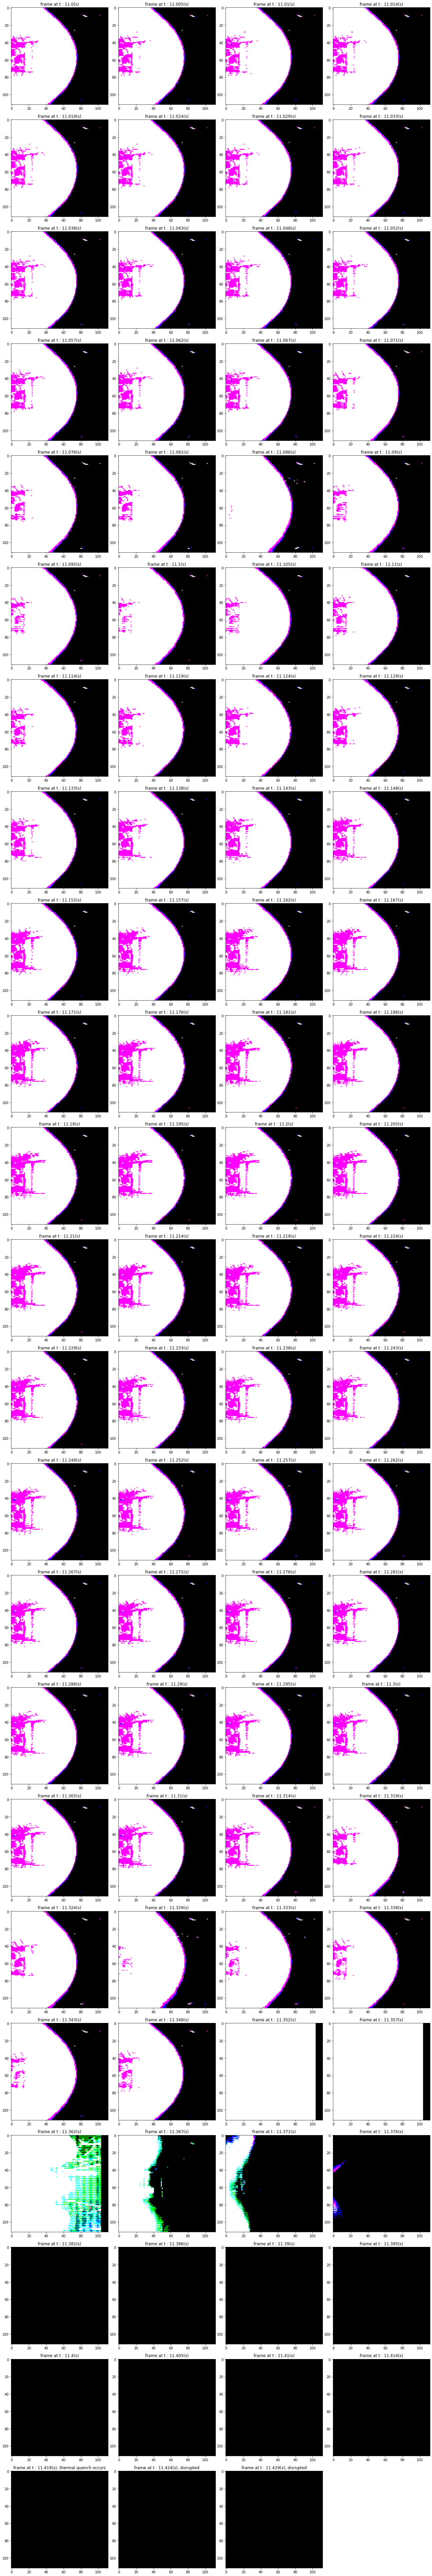

In [5]:
from src.visualization.visualize_video import show_all_frame

video_path = "./dataset/raw_videos/raw_videos/021747tv01.avi"
shot_list_dir = "./dataset/KSTAR_Disruption_Shot_List.csv"
shot_number = 21747

show_all_frame(
    dir = video_path, 
    shot_list_dir = shot_list_dir,
    shot_number = shot_number,
    t_start = 11.0, 
    t_end = None, 
    t_interval = 1.0 / 210,
)

In [6]:
tTQend = kstar_shot_list[kstar_shot_list.shot == shot_number].tTQend.values
tftsrt = kstar_shot_list[kstar_shot_list.shot == shot_number].tftsrt.values
tipminf = kstar_shot_list[kstar_shot_list.shot == shot_number].tipminf.values

print("tTQend : ", tTQend)

tTQend :  [11.419]


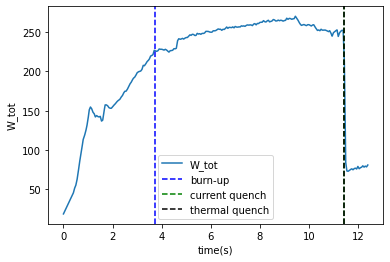

In [8]:
df_shot = df_extend[df_extend.shot == shot_number]

t = df_shot.time
ip = df_shot['\\ipmhd']
kappa = df_shot['\\kappa']
betap = df_shot['\\betap']
betan = df_shot['\\betan']
li = df_shot['\\li']
Bc = df_shot['\\bcentr']
q95 = df_shot['\\q95']
tritop = df_shot['\\tritop']
tribot = df_shot['\\tribot']
W_tot = df_shot['\\WTOT_DLM03']

import matplotlib.pyplot as plt
plt.plot(t, W_tot, label = 'W_tot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('W_tot')
plt.legend()
plt.show()

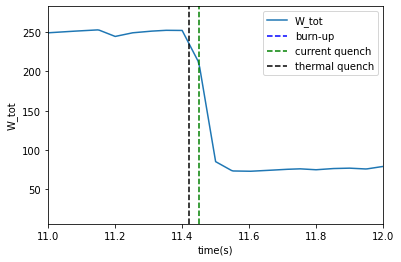

In [10]:
plt.plot(t, W_tot, label = 'W_tot')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('W_tot')
plt.xlim([11.0, 12.0])
plt.legend()
plt.show()

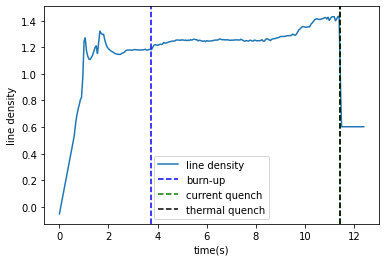

In [9]:
plt.plot(t, li, label = 'line density')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('line density')
plt.legend()
plt.show()

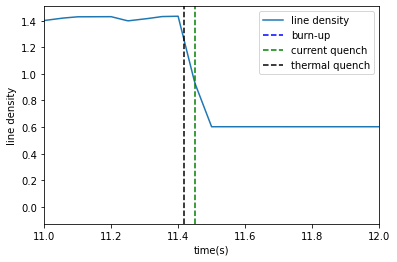

In [11]:
plt.plot(t, li, label = 'line density')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('line density')
plt.xlim([11.0, 12.0])
plt.legend()
plt.show()

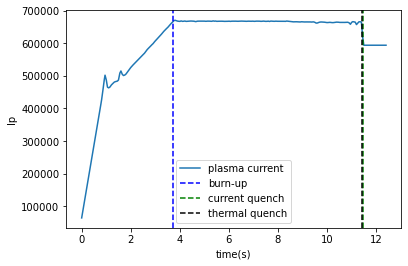

In [13]:
plt.plot(t, -ip, label = 'plasma current')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('Ip')
plt.legend()
plt.show()

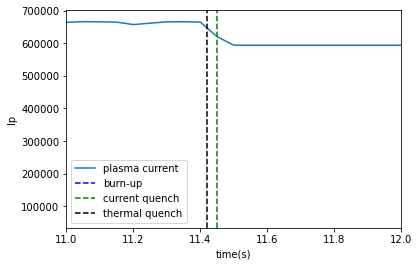

In [14]:
plt.plot(t, -ip, label = 'plasma current')
plt.axvline(x = tftsrt, ymin = 0,  color = "blue", linestyle = "dashed", label = "burn-up")
plt.axvline(x = tipminf, ymin = 0, color = "green", linestyle = "dashed", label = "current quench")
plt.axvline(x = tTQend, ymin = 0, color = "black", linestyle = "dashed", label = "thermal quench")
plt.xlabel('time(s)')
plt.ylabel('Ip')
plt.xlim([11.0, 12.0])
plt.legend()
plt.show()